# ABR équilibrés: les AVL

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from arbres import Noeud, graphe_arbre

---
Exercice 0

Construire un arbre complètement aléatoire (pas forcément un ABR), dont la taille est précisée.

In [3]:
from random import randint

def insertion_aléatoire(a, valeur):
    """
    Place un nouveau noeud avec la valeur donnée dans l'arbre binaire a, aléatoirement.
    """
    
    if a is None:
        return Noeud(valeur)
    else:
        if randint(0, 1) == 0:
            return Noeud(a.valeur, 
                         gauche=insertion_aléatoire(a.gauche, valeur),
                         droite=a.droite)
        else:
            return Noeud(a.valeur, 
                         gauche=a.gauche,
                         droite=insertion_aléatoire(a.droite, valeur))

In [4]:
def arbre_aléatoire(n):
    """
    Construit un arbre binaire complètement aléatoire contenant n noeuds.
    """
    
    a = None
    
    for _ in range(n):
        a = insertion_aléatoire(a, randint(1, 100))
        
    return a

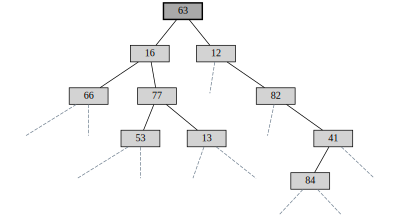

In [5]:
a = arbre_aléatoire(10)
display(graphe_arbre(a, largeur=14))

---
## Exercice 1

1. Écrire une fonction `minimax_ABR(a)` qui prend pour paramètre un arbre binaire (pas forcément un ABR) non vide, et renvoie 3 valeurs:
* sa valeur minimale;
* sa valeur maximale;
* un booléen indiquant s'il s'agit d'un ABR.

2. En déduire une fonction `est_ABR(a)` qui renvoie un booléen testant si un arbre binaire (potentiellement vide) est un ABR ou non.

In [6]:
def minimum_ABR(a):
    """
    Recherche le minimum dans l'ABR a
    """
    
    if a.gauche is None:
        mini = a.valeur
    else:
        mini = minimum_ABR(a.gauche)
        
    return mini

In [7]:
def maximum_ABR(a):
    """
    Recherche le maximum dans l'ABR a
    """
    
    if a.droite is None:
        maxi = a.valeur
    else:
        maxi = maximum_ABR(a.droite)
        
    return maxi

In [8]:
def minimum(a):
    """
    Renvoie le minimum de l'arbre binaire a (qui n'est PAS un ABR) dont les valeurs
    sont comparables. a est supposé non vide.
    """
    
    if a.gauche is None and a.droite is None:
        return a.valeur
    else:
        mini = a.valeur
        
        if not a.gauche is None:
            mini = min(mini, minimum(a.gauche))
        
        if not a.droite is None:
            mini = min(mini, minimum(a.droite))
            
        return mini

In [9]:
def maximum(a):
    """
    Renvoie le maximum de l'arbre binaire a (qui n'est PAS un ABR) dont les valeurs
    sont comparables. a est supposé non vide.
    """
    
    if a.gauche is None and a.droite is None:
        return a.valeur
    else:
        maxi = a.valeur
        
        if not a.gauche is None:
            maxi = max(maxi, maximum(a.gauche))
        
        if not a.droite is None:
            maxi = max(maxi, maximum(a.droite))
            
        return maxi
    

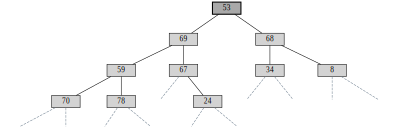

Le minimum de cet arbre est 8, son maximum est 78.


In [10]:
a = arbre_aléatoire(10)
display(graphe_arbre(a, largeur=14))
print("Le minimum de cet arbre est {}, son maximum est {}.".format(minimum(a), maximum(a)))

In [11]:
def minimaxi(a):
    """
    Renvoie le minimum et le maximum de l'arbre binaire NON VIDE a, dont les valeurs
    sont comparables.
    
    Attention, a n'est pas un ABR.
    """
    
    mini = a.valeur
    maxi = a.valeur

    if not a.gauche is None:
        minig, maxig = minimaxi(a.gauche)
        mini = min(mini, minig)
        maxi = max(maxi, maxig)
        
    if not a.droite is None:
        minid, maxid = minimaxi(a.droite)
        mini = min(mini, minid)
        maxi = max(maxi, maxid)
        
    return mini, maxi

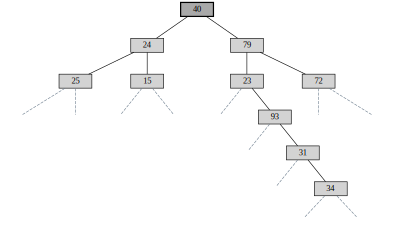

Le minimum de cet arbre est 15, son maximum est 93.


In [12]:
a = arbre_aléatoire(10)
display(graphe_arbre(a, largeur=14))
m, M = minimaxi(a)
print("Le minimum de cet arbre est {}, son maximum est {}.".format(m, M))

In [13]:
def minimaxi_ABR(a):
    """
    Renvoie le minimum et le maximum de l'arbre binaire NON VIDE a, dont les valeurs
    sont comparables, ainsi qu'un booléen spécifiant si a est un ABR.
    
    Attention, a n'est pas un ABR.
    """
    
    mini = a.valeur
    maxi = a.valeur

    if not a.gauche is None:
        minig, maxig, ABRg = minimaxi_ABR(a.gauche)
        mini = min(mini, minig)
        maxi = max(maxi, maxig)
    else:
        ABRg = True
        maxig = a.valeur - 1
        
    if not a.droite is None:
        minid, maxid, ABRd = minimaxi_ABR(a.droite)
        mini = min(mini, minid)
        maxi = max(maxi, maxid)
    else:
        ABRd = True
        minid = a.valeur

    est_ABR = (ABRg == True) and (ABRd == True) and (maxig < a.valeur <= minid)
    
    return mini, maxi, est_ABR

In [14]:
def est_ABR(a):
    _, _, ok = minimaxi_ABR(a)
    
    return ok

In [15]:
def insertion_ABR(x, a):
    """
    Insère la nouvelle valeur x dans l'ABR dont la racine est a.
    """
    
    if a is None:
        return Noeud(x)
    else:
        v = a.valeur

        if x < v:
            # On insère x dans le sous-arbre à gauche
            nouveau_gauche = insertion_ABR(x, a.gauche)
            return Noeud(v, gauche=nouveau_gauche, droite=a.droite)
        else:
            # On insère x dans le sous-arbre à droite
            nouveau_droite = insertion_ABR(x, a.droite)
            return Noeud(v, gauche=a.gauche, droite=nouveau_droite)

In [16]:
N = 1000

for _ in range(100):
    t = [randint(-1000, 1000) for _ in range(N)]
    mini = min(t)
    maxi = max(t)
    
    a = None
    for v in t:
        a = insertion_ABR(v, a)
        
    assert est_ABR(a)

---
## Exercice 2

1. Écrire une fonction `rotation_droite(a)` réalisant l'opération suivante:
* On part de l'arbre 

  ![](images/rotation-gauche.png)
* ...pour arriver à l'arbre 

  ![](images/rotation-droite.png)

In [19]:
def rotation_droite(a):
    y = a.valeur
    x = a.gauche.valeur
    T1 = a.gauche.gauche
    T2 = a.gauche.droite
    T3 = a.droite
    return Noeud(x, T1, Noeud(y, T2, T3))

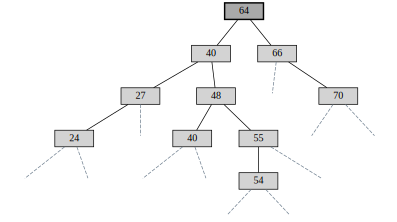

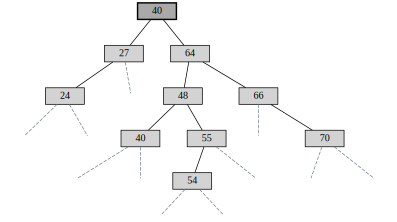

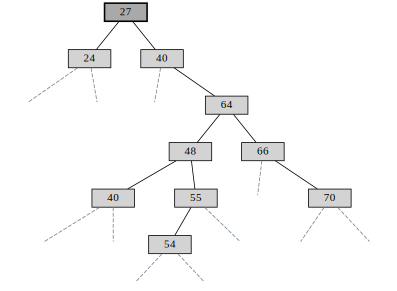

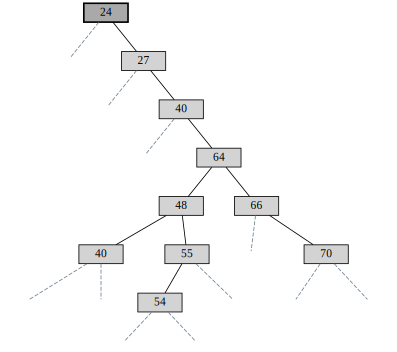

In [25]:
N = 10

a = None
for _ in range(10):
    a = insertion_ABR(randint(1, 100), a)

display(graphe_arbre(a, largeur=14))
while not a.gauche is None:
    a = rotation_droite(a)
    display(graphe_arbre(a, largeur=14))

2. Écrire une fonction `rotation_gauche(a)` qui réalise exactement l'opération inverse:
* On part de l'arbre 

  ![](images/rotation-droite.png)
* ...pour arriver à l'arbre 

  ![](images/rotation-gauche.png)

In [26]:
def rotation_gauche(a):
    x = a.valeur
    T1 = a.gauche
    y = a.droite.valeur
    T2 = a.droite.gauche
    T3 = a.droite.droite
    
    return Noeud(y, Noeud(x, T1, T2), T3)

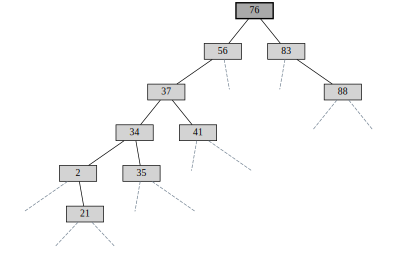

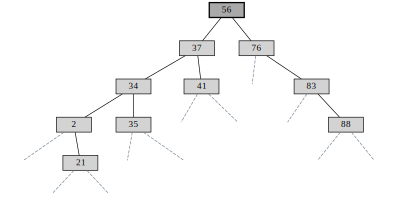

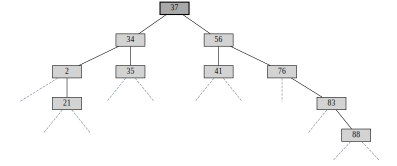

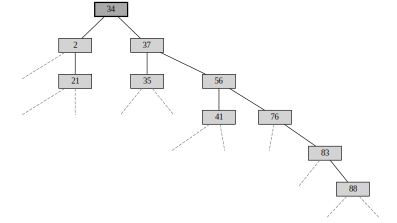

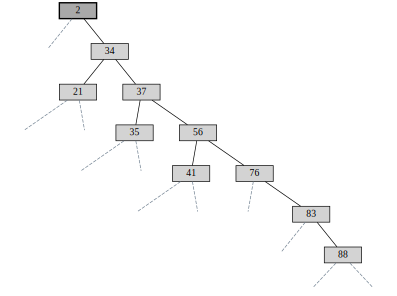

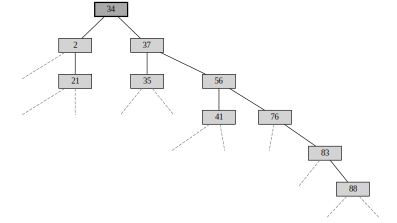

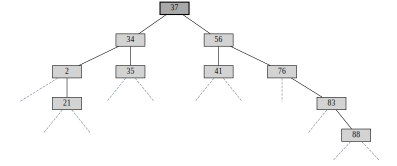

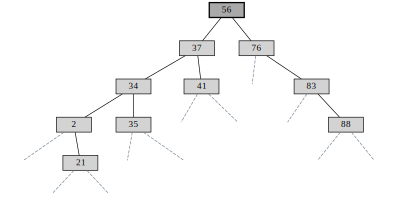

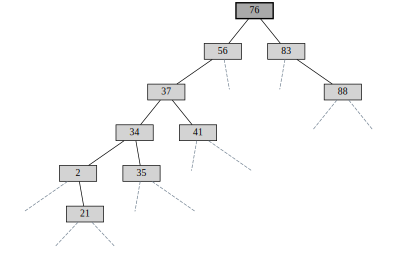

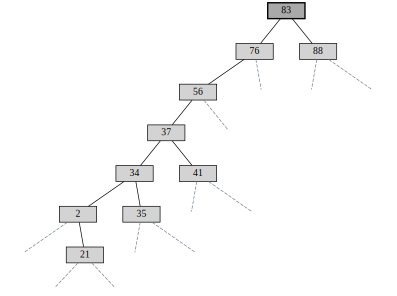

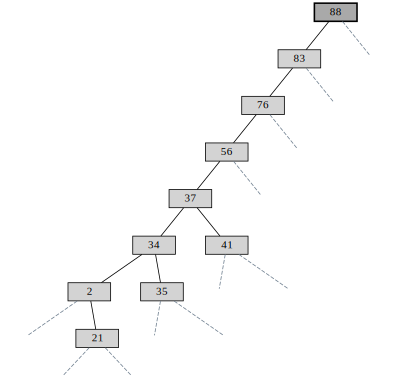

In [27]:
N = 10

a = None
for _ in range(10):
    a = insertion_ABR(randint(1, 100), a)

display(graphe_arbre(a, largeur=14))
while not a.gauche is None:
    a = rotation_droite(a)
    display(graphe_arbre(a, largeur=14))
    
while not a.droite is None:
    a = rotation_gauche(a)
    display(graphe_arbre(a, largeur=14))
    


3. Justifiez que les rotations à gauche et à droite donnent bien des ABR en sortie (si on leur fournit des ABR en entrée).

## Exercice 3 - les AVL

Un [AVL](https://fr.wikipedia.org/wiki/Arbre_AVL) sont un type particulier d'arbres binaires de recherches, pour lesquels ont maintient un certain équilibre.

Plus précisément, un AVL est un ABR ayant la condition supplémentaire que la différence de hauteur entre ses sous-arbres gauche et droit est au maximum de 1: l'arbre est soit équilibré, soit quasiment équilibré.

In [29]:
def hauteur(a):
    if a is None:
        return 0
    else:
        return 1 + max(hauteur(a.gauche), hauteur(a.droite))

In [31]:
def est_AVL(a):
    """
    Renvoie un booléen spécifiant si a est un AVL ou non.
    """
    
    if est_ABR(a):
        hg = hauteur(a.gauche)
        hd = hauteur(a.droite)
        return -1 <= hg - hd <= 1 and est_AVL(a.gauche) and est_AVL(a.droite)
    else:
        False

### Insertion dans un AVL

Pour insérer un nouvel élément dans un AVL, il est nécessaire de maintenir la condition de quasi-équilibre, car celle-ci pourrait être brisée.

On procède comme suit:

* On insère l'élément `e` dans l'arbre suivant la procédure (récursive) habituelle.
* Après avoir inséré `e` dans l'arbre, on calcule la différence de hauteur entre les sous-arbres gauche et droit.
  * Si cette différence est -1, 0 ou 1, on a encore un AVL, on ne fait rien de plus;
  * Si cette différence est -2 ou +2, on a un arbre trop déséquilibré, il faut donc le rééquilibrer. On a 4 possibilités:
    1. Si la différence est -2 (c'est le sous-arbre gauche qui a une hauteur dépassant de 2) et que l'élément `e` a été inséré à gauche du sous-arbre gauche,
    on part de cet arbre:
    
    ![](images/gauche-gauche-1.png)
    
    pour arriver (par une rotation à droite) à cet arbre:
    
    ![](images/gauche-gauche-2.png)
    
    1. Si la différence est -2 mais que l'élément 'e' a été inséré à droite du sous-arbre gauche, on part de cet arbre:
    
    ![](images/gauche-droite-1.png)
    
    pour passer par cet arbre (par une rotation à gauche):
    
    ![](images/gauche-droite-2.png)
    
    et finalement arriver à celui-ci (par une rotation à droite):
    
    ![](images/gauche-droite-3.png)
    
    1. Si la différence est +2 et que `e` a été inséré à gauche du sous-arbre droit, on part de cet arbre:
    
    ![](images/droite-gauche-1.png)
    
    pour passer par cet arbre (par une rotation à droite):
    
    ![](images/droite-gauche-2.png)
    
    et finalement arriver à celui-ci (par une rotation à gauche):
    
    ![](images/droite-gauche-3.png)
    
    1. Enfin, si la différence est +2 et que `e` a été inséré à droite du sous-arbre droit, on part de cet arbre:
    
    ![](images/droite-droite-1.png)
    
    pour passer par cet arbre (par une rotation à gauche):
    
    ![](images/droite-droite-2.png) 
    

1. Écrivez la fonction `est_AVL(a)` qui teste si un arbre binaire est un AVL ou non.
1.Implémentez la fonction `insertion_AVL(e, a)` qui utilise cet algorithme.

In [32]:
def insertion_AVL(x, a):
    """
    Insère la nouvelle valeur x dans l'AVL dont la racine est a, tout en maintenant la condition de quasi-équilibre.
    """
    
    if a is None:
        return Noeud(x)
    else:
        v = a.valeur

        if x < v:
            # On insère x dans le sous-arbre à gauche
            nouveau_gauche = insertion_AVL(x, a.gauche)
            a = Noeud(v, gauche=nouveau_gauche, droite=a.droite)
        else:
            # On insère x dans le sous-arbre à droite
            nouveau_droite = insertion_AVL(x, a.droite)
            a = Noeud(v, gauche=a.gauche, droite=nouveau_droite)
    
        hg = hauteur(a.gauche)
        hd = hauteur(a.droite)
        
        diff = hd - hg
        
        if -1 <= diff <= 1:
            # On a déjà un AVL
            return a
        else:
            # On a un déséquilibre
            
            if diff == -2:
                if x < a.gauche.valeur:
                    # On est dans le premier cas
                    return rotation_droite(a)
                else:
                    # On est dans le deuxième cas
                    
                    # rotation à gauche du sous-arbre à gauche
                    a = Noeud(a.valeur, rotation_gauche(a.gauche), a.droite)
                    
                    # rotation à droite de l'arbre complet:
                    return rotation_droite(a)
                    
            else:
                # diff = +2
                if x < a.droite.valeur:
                    # On est dans le troisième cas
                    
                    # rotation à droite du sous-arbre à gauche
                    a = Noeud(a.valeur, a.gauche, rotation_droite(a.droite))
                    
                    # rotation à gauche de l'arbre complet
                    return rotation_gauche(a)
                else:
                    # On est dans le quatrième cas
                    return rotation_gauche(a)        

Insertion de 15:




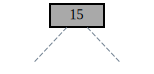

Insertion de 17:




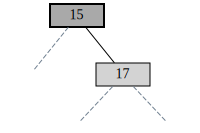

Insertion de 2:




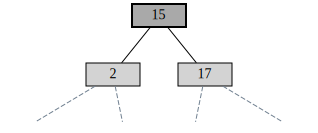

Insertion de 36:




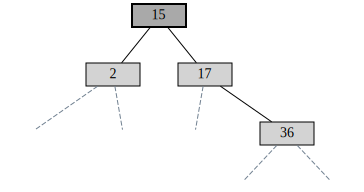

Insertion de 96:




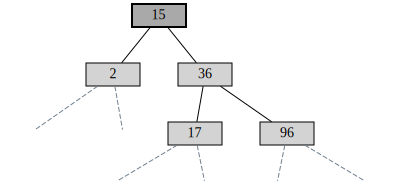

Insertion de 87:




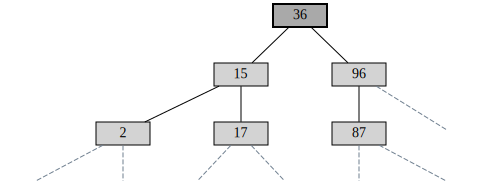

Insertion de 82:




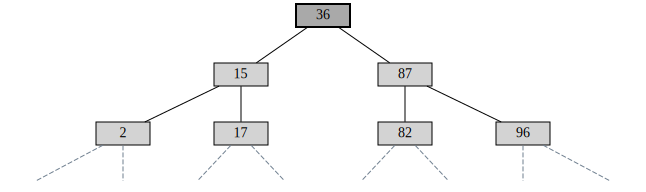

Insertion de 97:




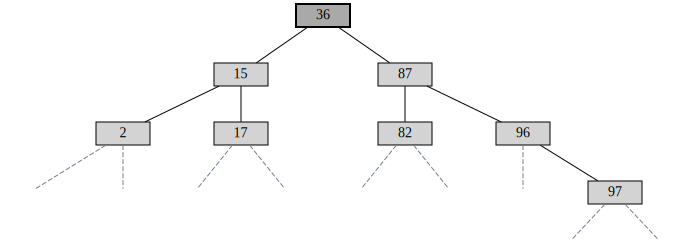

Insertion de 67:




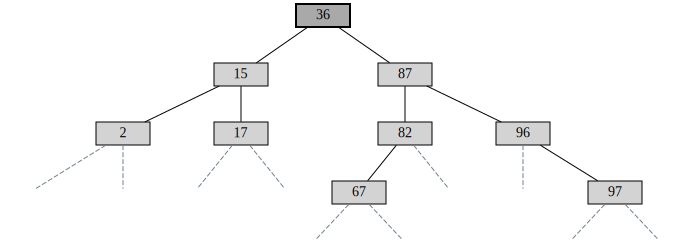

Insertion de 42:




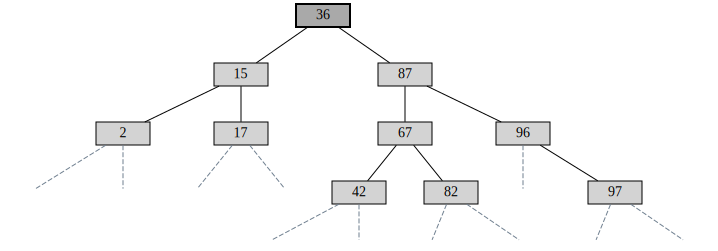

In [34]:
a = None
for _ in range(10):
    v = randint(1, 100)
    print("Insertion de {}:\n\n".format(v))
    a = insertion_AVL(v, a)
    display(graphe_arbre(a))